In [31]:
#Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [33]:
# Carregando a base de dados
df = pd.read_csv('desafio_indicium_imdb.csv')

# Removendo a coluna "Unnamed: 0" se ela existir, referindo-se a uma coluna de índices
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Exibindo as 5 primeiras linhas do dataframe
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


       IMDB_Rating  Meta_score   No_of_Votes
count   999.000000  842.000000  9.990000e+02
mean      7.947948   77.969121  2.716214e+05
std       0.272290   12.383257  3.209126e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.547150e+04
50%       7.900000   79.000000  1.383560e+05
75%       8.100000   87.000000  3.731675e+05
max       9.200000  100.000000  2.303232e+06


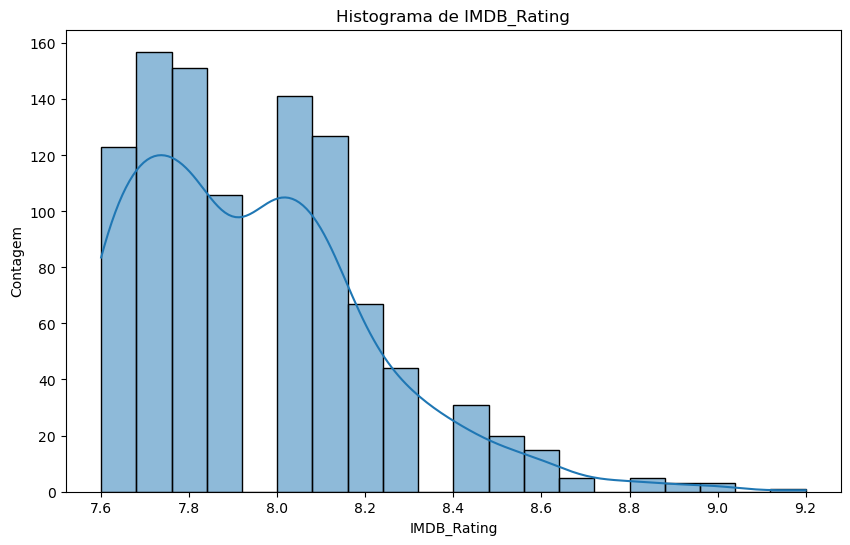

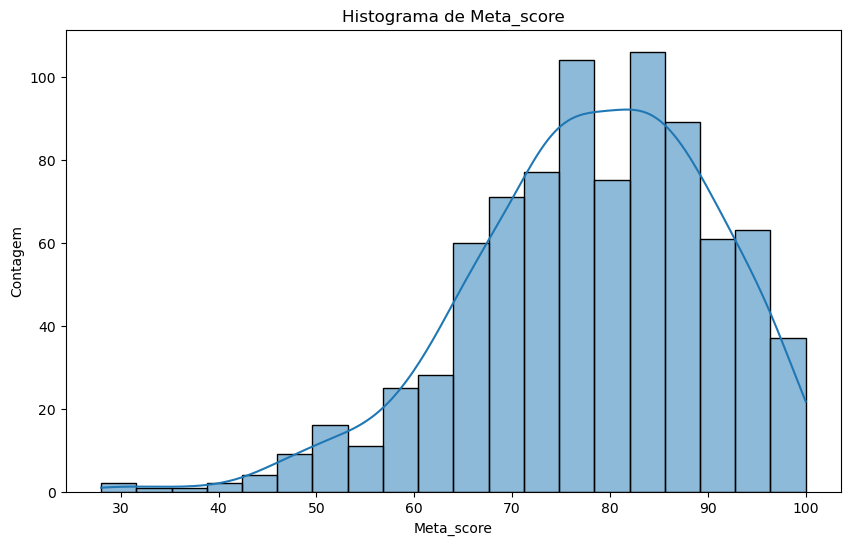

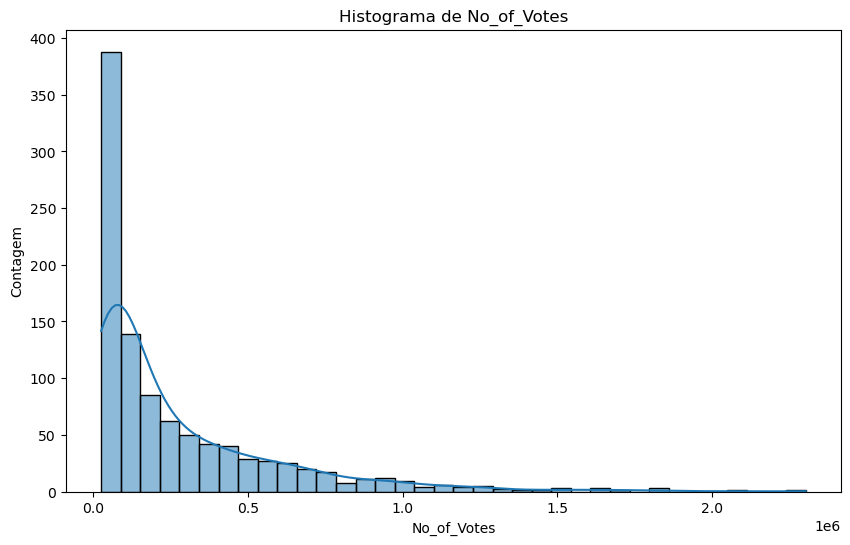

Contagem de valores para Series_Title:
Series_Title
Drishyam                  2
The Godfather             1
Majo no takkyûbin         1
The Sandlot               1
The Remains of the Day    1
                         ..
Blade Runner 2049         1
Her                       1
Bohemian Rhapsody         1
The Revenant              1
The 39 Steps              1
Name: count, Length: 998, dtype: int64


Contagem de valores para Released_Year:
Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1937     1
1936     1
1924     1
PG       1
Name: count, Length: 100, dtype: int64


Contagem de valores para Certificate:
Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64


Contagem de valores para Runtime:
Runtime
130 min

In [35]:
# Resumo estatístico das variáveis numéricas
print(df.describe()) #Fornece dados como média, desvio padrão, mínimo, máximo, quartis 

# Histogramas e gráficos de densidade para variáveis numéricas
numeric_features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histograma de {feature}')
    plt.xlabel(feature)
    plt.ylabel('Contagem')
    plt.show()

# Contagem de valores para variáveis categóricas
categorical_features = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime','Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']
for feature in categorical_features:
    print(f'Contagem de valores para {feature}:')
    print(df[feature].value_counts())
    print('\n')

In [36]:
# Verificar se há valores ausentes
print(df.isnull().sum())

# Preencher valores ausentes, se houver necessidade
df.ffill(inplace=True)

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [37]:
# Selecionar as features e o target
# Supondo que a coluna 'IMDB_Rating' seja o target
X = df.drop('IMDB_Rating', axis=1)
y = df['IMDB_Rating']

# Identificação das colunas categóricas
categorical_features = ['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross']

# Criar o transformador de colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # mantém as colunas que não são categóricas
)

# Aplicando a transformação
X = preprocessor.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de Regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo usando erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro quadrático médio: {mse}')

Erro quadrático médio: 0.05652998134123665


In [38]:
# Inserção de novos dados
new_data = {
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': ['1994'],
    'Certificate': ['A'],
    'Runtime': ['142 min'],
    'Genre': ['Drama'],
    'Overview': ['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'],
    'Meta_score': [80.0],
    'Director': ['Frank Darabont'],
    'Star1': ['Tim Robbins'],
    'Star2': ['Morgan Freeman'],
    'Star3': ['Bob Gunton'],
    'Star4': ['William Sadler'],
    'No_of_Votes': [2343110],
    'Gross': ['28,341,469']
}

# Convertendo o dicionário em um DataFrame pandas
new_df = pd.DataFrame(new_data)

# Aplicando a transformação nos novos dados
new_X = preprocessor.transform(new_df)

# Fazendo previsões
new_predictions = model.predict(new_X)
print(f'Previsão de IMDB_Rating: {new_predictions[0]}')

Previsão de IMDB_Rating: 8.855721879186872


C:\Users\josem\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 5, 7, 8, 9, 10, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [39]:
# salvando o modelo treinado

# Nome do arquivo .pkl para salvar o modelo
file_name = 'modelo_treinado.pkl'

# Salvar o modelo treinado como arquivo .pkl
with open(file_name, 'wb') as f:
    pickle.dump(model, f)

print(f'Modelo salvo como {file_name}')

Modelo salvo como modelo_treinado.pkl
